# Generator of Hyper-Grid Graphs of side $N$ and dimensions $d$

The generator follows the "formula" for LCFS notation below.

$N^d[\{[[N^i]\{N^{i+1}-N^i\},[0]N^i]N^{d-i}  |  i \in \mathbb{N}_0, i < d \} ]1$

It produces a LCFS sequence that is used to constructs the graph


by Christopher Stone


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import math


### LCFS Parser

In [ ]:
def LCFS(N_vertices, sequence, repetitions):
  G = nx.Graph()
  vertices = range(N_vertices)
  currentVertex = 0

  for v in vertices:
    G.add_node(v)
  for r in range(repetitions):
    for i in range(len(sequence)):
      if(sequence[i] != 0):
        target = (currentVertex + sequence[i])%N_vertices
        G.add_edge(currentVertex, vertices[target])
      currentVertex = (1 + currentVertex)% N_vertices

  return G

### Hyper-Grid Generator

For each $i$ from 0 to $d-1$ it creates a subsequence with a value $N^i$ repeated $N^{i+1}-N^i$ times, followed by $N^i$ zeros, all repeated $N^{d-i}$ times. The subsequence do not need to be in order and could be generated with set comprehension, a loop is used for convenience.

In [ ]:
def HGG(N,d):
  sequence = []
  for i in range(d):
    subsequence = []
    subsequence.extend([math.pow(N,i)]*int((math.pow(N,i+1)-math.pow(N,i))) ) # Value N^i repeated N^{i+1}-N^i
    subsequence.extend([0]*int(math.pow(N,i))) # N^i zeros
    subsequence = subsequence * int(math.pow(N,d-i)) # repeated N^{d-1}
    sequence.extend(subsequence)
  sequence = [int(item) for item in sequence]
  return sequence

In [ ]:
# same implementation possibly easier to understand.
def HGG2(N,d):
  sequence = []
  for i in range(d):
    subsequence = []
    subsequence.extend([N**i]*(N**(i+1)-N**i)) # Value N^i repeated N^{i+1}-N^i
    subsequence.extend([0]*N**i) # N^i zeros
    subsequence = subsequence * N**(d-i) # repeated N^{d-1}
    sequence.extend(subsequence)
  sequence = [int(item) for item in sequence]
  return sequence

### Parameters

In [ ]:
SideLength = 2
dimensions = 4
s = HGG2(SideLength,dimensions)
g = LCFS(int(math.pow(SideLength, dimensions)),s,1)

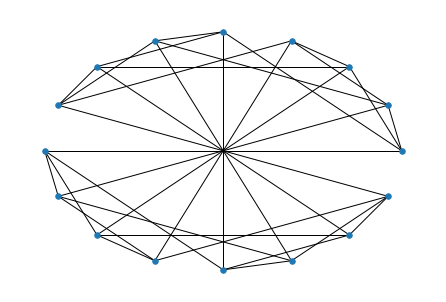

In [ ]:
nx.draw(g, nx.circular_layout(g),node_size=30)

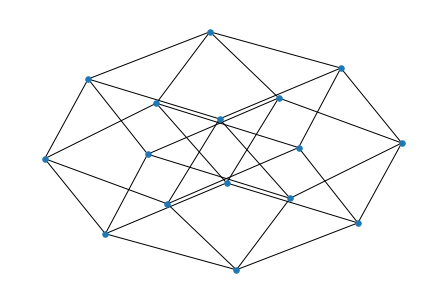

In [ ]:
nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 1230),node_size=30)

In [ ]:
#@title 3D Plot
layt = nx.spring_layout(g,iterations = 1350, dim=3)

#layt=g.layout('fr3d', dim=3)
N = g.number_of_nodes()
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in g.edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgba(50,125,250,0.8)', width=5),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='Articles',
               marker=dict(symbol='circle',
                             size=4,
                             color='rgb(50,110,250)',
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.2)
                             ),
               #text=labels,
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Graph",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    paper_bgcolor='rgba(11,11,11,11)',
    plot_bgcolor='rgba(22,22,22,22)')

data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
SideLength=12
dimensions = 2
s = HGG(SideLength,dimensions)
g = LCFS(int(math.pow(SideLength, dimensions)),s,1)

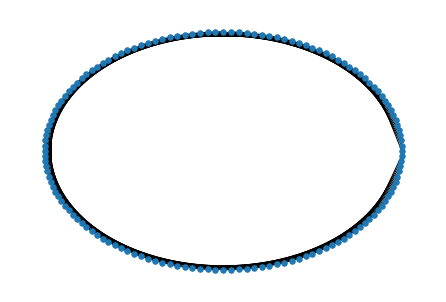

In [ ]:
nx.draw(g, nx.circular_layout(g),node_size=30)

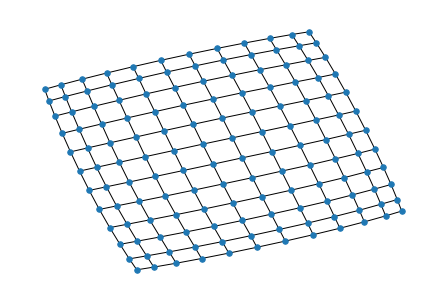

In [ ]:
nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 1230),node_size=30)

In [ ]:
#@title 3D Plot
layt = nx.spring_layout(g,iterations = 1350, dim=3)

#layt=g.layout('fr3d', dim=3)
N = g.number_of_nodes()
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in g.edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgba(50,125,250,0.8)', width=5),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='Articles',
               marker=dict(symbol='circle',
                             size=4,
                             color='rgb(50,110,250)',
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.2)
                             ),
               #text=labels,
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Graph",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest',
    paper_bgcolor='rgba(11,11,11,11)',
    plot_bgcolor='rgba(22,22,22,22)')

data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)
fig.show()

In [ ]:
SideLength=10
dimensions = 3
s = HGG(SideLength,dimensions)
g = LCFS(int(math.pow(SideLength, dimensions)),s,1)

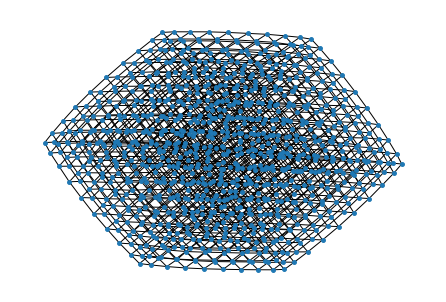

In [ ]:
nx.draw(g, nx.fruchterman_reingold_layout(g,iterations = 1230),node_size=15)

In [ ]:
#@title 3D Plot
layt = nx.spring_layout(g,iterations = 1350, dim=3)

#layt=g.layout('fr3d', dim=3)
N = g.number_of_nodes()
Xn=[layt[k][0] for k in range(N)]# x-coordinates of nodes
Yn=[layt[k][1] for k in range(N)]# y-coordinates
Zn=[layt[k][2] for k in range(N)]# z-coordinates
Xe=[]
Ye=[]
Ze=[]
for e in g.edges:
    Xe+=[layt[e[0]][0],layt[e[1]][0], None]# x-coordinates of edge ends
    Ye+=[layt[e[0]][1],layt[e[1]][1], None]
    Ze+=[layt[e[0]][2],layt[e[1]][2], None]

trace1=go.Scatter3d(x=Xe,
               y=Ye,
               z=Ze,
               mode='lines',
               line=dict(color='rgb(125,125,125)', width=1),
               hoverinfo='none'
               )

trace2=go.Scatter3d(x=Xn,
               y=Yn,
               z=Zn,
               mode='markers',
               name='Articles',
               marker=dict(symbol='circle',
                             size=4,
                             color='rgb(50,110,250)',
                             colorscale='Viridis',
                             line=dict(color='rgb(50,50,50)', width=0.5)
                             ),
               #text=labels,
               hoverinfo='text'
               )

axis=dict(showbackground=False,
          showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title=''
          )

layout = go.Layout(
         title="Graph",
         width=1000,
         height=1000,
         showlegend=False,
         scene=dict(
             xaxis=dict(axis),
             yaxis=dict(axis),
             zaxis=dict(axis),
        ),
     margin=dict(
        t=100
    ),
    hovermode='closest'
    ,    )

data=[trace1, trace2]
fig=go.Figure(data=data, layout=layout)
fig.show()